In [3]:
!pip install easyocr
!pip install imutils

In [4]:
!pip install opencv-python


In [5]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils
import easyocr

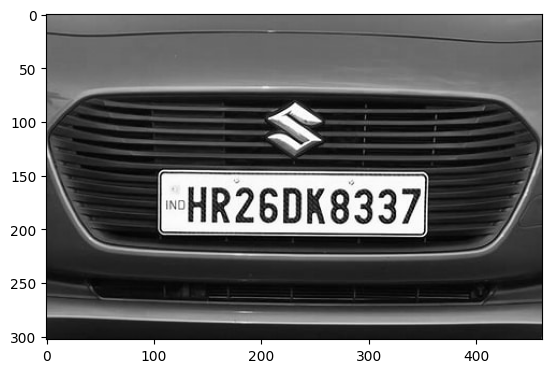

In [80]:
img = cv2.imread('th.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

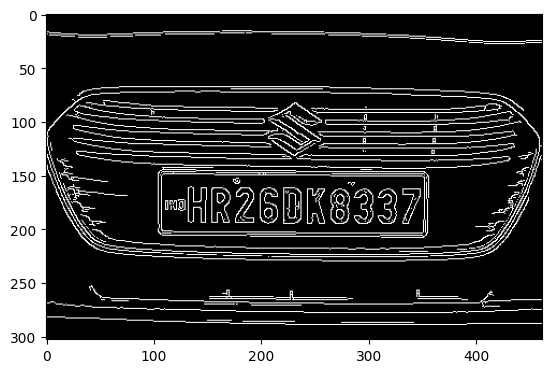

In [82]:
bfilter = cv2.bilateralFilter(gray, 11, 17, 17) #Noise reduction
edged = cv2.Canny(bfilter, 30, 200) #Edge detection
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

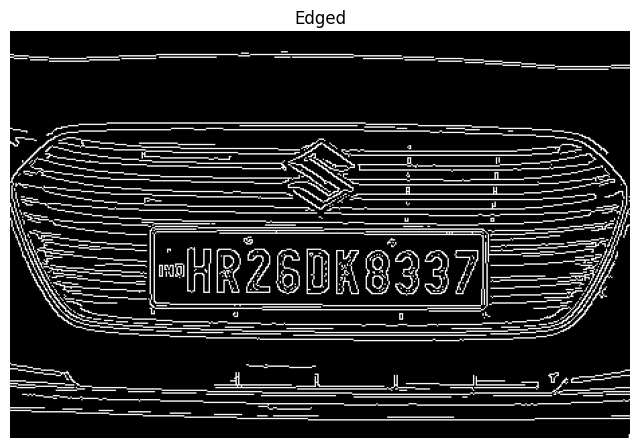

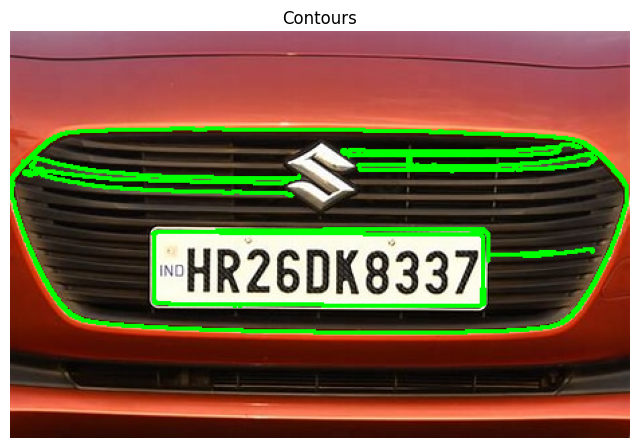

In [84]:
import cv2
import matplotlib.pyplot as plt
import imutils

# Load the image and convert to grayscale
image_path = 'th.jpg'
img = cv2.imread(image_path)

# Check if the image was loaded successfully
if img is None:
    print("Error: Image not found. Please check the file path.")
    exit()

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Perform edge detection (Canny edge detector)
edged = cv2.Canny(gray, 50, 150)

# Find contours from the edge-detected image
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)

# Sort contours by area and keep the largest 10
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

# Draw the contours on the original image for visualization (optional)
cv2.drawContours(img, contours, -1, (0, 255, 0), 2)

# Display the edge-detected image using matplotlib
plt.figure(figsize=(8, 6))
plt.title("Edged")
plt.imshow(edged, cmap='gray')
plt.axis('off')
plt.show()

# Display the image with contours using matplotlib
plt.figure(figsize=(8, 6))
plt.title("Contours")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


In [86]:
import cv2
import imutils

# Load the image
image_path = 'th.jpg'
img = cv2.imread(image_path)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
edged = cv2.Canny(gray, 50, 150)
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]


In [96]:
# Approximation with dynamic adjustment
for contour in contours:
    peri = cv2.arcLength(contour, True)
    approx = cv2.approxPolyDP(contour, 0.02 * peri, True)
    if len(approx) == 4:  # Check for quadrilateral
        location = approx
        break

if location is None:
    print("No quadrilateral found.")
else:
    print("Quadrilateral found at:", location)

# Visualize the detected location
mask = np.zeros(gray.shape, np.uint8)
cv2.drawContours(mask, [location], 0, 255, -1)
result = cv2.bitwise_and(img, img, mask=mask)
cv2.imshow("Masked Result", result)
cv2.waitKey(0)
cv2.destroyAllWindows()


Quadrilateral found at: [[[107 151]]

 [[350 151]]

 [[351 203]]

 [[109 202]]]


error: OpenCV(4.11.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:1301: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvShowImage'


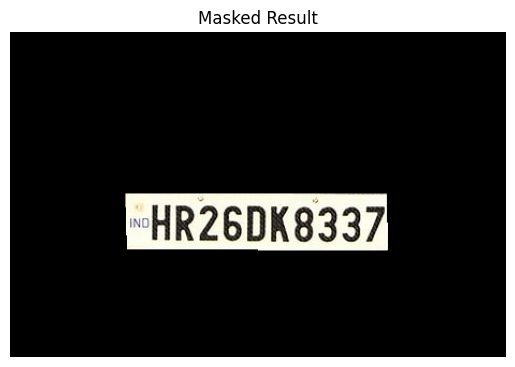

In [98]:
import matplotlib.pyplot as plt

# Convert the image from BGR (OpenCV default) to RGB (for matplotlib)
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.axis('off')  # Hide axes for a cleaner visualization
plt.title("Masked Result")
plt.show()
